In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("ready_to_use_data.csv")

In [3]:
features = ['Max.', 'Min.', 'Rain', 'PE', 'Morn', 'Eve']
X = df[features]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
gmm = GaussianMixture(n_components=10, random_state=42 , init_params='kmeans')  # You can try 2, 3, 4 clusters
gmm.fit(X_scaled)


,n_components,10
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [11]:
df['GMM_Cluster'] = gmm.predict(X_scaled)
df['Cluster_Prob'] = gmm.predict_proba(X_scaled).max(axis=1)

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

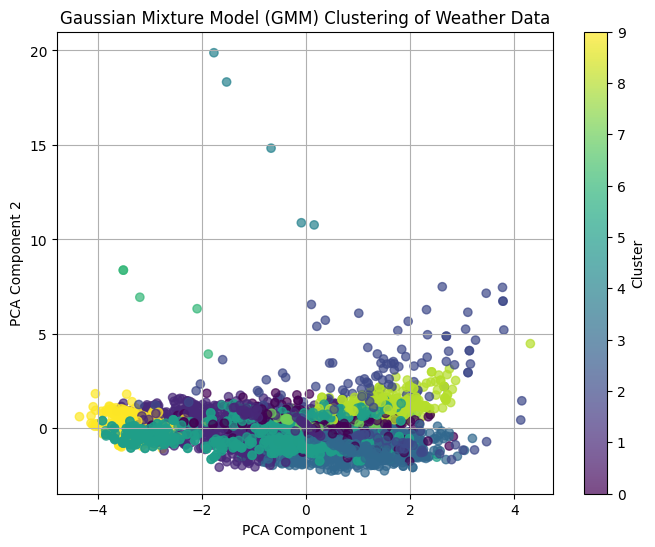

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['GMM_Cluster'], cmap='viridis', alpha=0.7)
plt.title("Gaussian Mixture Model (GMM) Clustering of Weather Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [9]:
# PCA component is a dimensionality reduction technique — used to reduce many features (columns) into
# 2 or 3 main "components" that still capture most of the important information (variance) in the data

# Dimention in My case is 6D - ['Max.', 'Min.', 'Rain', 'PE', 'Morn', 'Eve']

# Each of these adds one dimension. So, your dataset is in 6D space, which we can't visualize easily.
# PCA finds a way to project this 6D data into 2D space while keeping as much useful variation as possible.